## 课程论文

 请务必交到exer8文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请于12月30日前先在github上提交
+ 请在元旦后提交纸质版，将本页面文件先打印为pdf格式，再去打印店付印
+ 请将论文模板和本页面文件一起装订，前者放上面，本页面文件放下面
+ 纸质版提交时间和地点请留意微信群通知

请写一下姓名和学号：
+ 姓名  马梓城
+ 学号  0165265

### 样本均值分布的统计试验

+ 请将CEPS.csv数据读入python
+ 请从中随机抽取1000个数据
+ 请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
+ 计算这两个连续变量的均值
+ 重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值
+ 绘制这30个样本均值的直方图
+ 计算均值的均值和标准误

In [56]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter


In [57]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [58]:
# 导入数据
# 连续型变量：a13身高，a14体重
sentinels = {'a13': [' '], 'a14': [' ']}
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)
df.head()

C:\Users\EstebanMa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
0,1,1,1,1,3,3,218.738892,0,0,11,...,3,1,,,3,3,3,1,1,2
1,2,1,1,1,3,3,216.518234,0,0,17,...,2,1,,,8,5,8,1,1,2
2,3,1,1,1,3,3,216.518234,0,0,12,...,2,2,1,3,3,3,3,1,1,1
3,4,1,1,1,3,3,218.738892,0,0,10,...,2,1,,,6,7,7,1,1,2
4,5,1,1,1,3,3,217.553040,0,0,10,...,3,1,,,7,8,8,1,1,2


In [60]:
# 选取1000个样本计算其中两个连续变量均值
data=df.sample(n=1000)
mean_height=data['a13'].mean()
mean_weight=data['a14'].mean()
print('样本均值身高为：%.2f厘米' %mean_height)
print('样本均值体重为：%.2f斤' %mean_weight)

样本均值身高为：161.94厘米
样本均值体重为：99.58斤


In [61]:
# 重复上述过程30次并计算
i=0
mean_height={}
mean_weight={}
while i<30:
    data_2=df.sample(n=1000)
    mean_height_2=data_2['a13'].mean()
    mean_height[i+1]=mean_height_2
    mean_weight_2=data_2['a14'].mean()
    mean_weight[i+1]=mean_weight_2
    i=i+1
    
print('样本均值身高为:')
print(mean_height)
print('\n样本均值体重为:')
print(mean_weight)

样本均值身高为:
{1: 161.79752066115702, 2: 161.68020833333333, 3: 161.1404958677686, 4: 161.70927835051546, 5: 161.96897621509825, 6: 161.546955624355, 7: 161.19672131147541, 8: 161.70072239422083, 9: 161.34397528321318, 10: 161.83594566353187, 11: 161.1722338204593, 12: 161.27880658436214, 13: 161.9296066252588, 14: 162.15, 15: 161.83178534571724, 16: 161.3944099378882, 17: 161.17368961973278, 18: 161.7528556593977, 19: 161.37860082304528, 20: 161.75695159629248, 21: 161.69089048106449, 22: 161.78144329896907, 23: 161.73792394655703, 24: 161.6490134994808, 25: 161.72907949790795, 26: 161.7747653806048, 27: 161.7582644628099, 28: 161.51770833333333, 29: 162.0279214064116, 30: 161.72565445026177}

样本均值体重为:
{1: 99.95609220636663, 2: 99.52562704471102, 3: 98.7582056892779, 4: 99.52449888641425, 5: 100.06877729257641, 6: 100.4004329004329, 7: 99.0196292257361, 8: 99.25764192139738, 9: 99.3281767955801, 10: 99.89289617486338, 11: 98.00553097345133, 12: 99.24972617743703, 13: 99.95956284153006, 14:

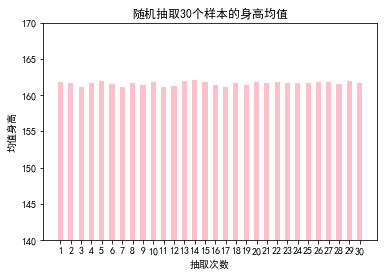

In [69]:
# 绘图（身高height）
ind = np.arange(len(mean_height.values()))
fig, ax = plt.subplots()
rects1 = ax.bar(ind, mean_height.values(), width=0.5, color='pink', label='均值身高')

ax.set_title('随机抽取30个样本的身高均值')
ax.set_xlabel('抽取次数')
ax.set_ylabel('均值身高')
ax.set_xticks(ind)
ax.set_xticklabels(mean_height.keys())
ax.set_ylim(140,170)

plt.show()

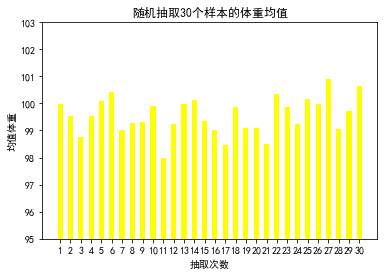

In [72]:
# 绘图（体重weight）
ind = np.arange(len(mean_weight.values()))
 
fig, ax = plt.subplots()
rects1 = ax.bar(ind, mean_weight.values(), width=0.5, color='yellow', label='均值体重')

ax.set_title('随机抽取30个样本的体重均值')
ax.set_xlabel('抽取次数')
ax.set_ylabel('均值体重')
ax.set_xticks(ind)
ax.set_xticklabels(mean_height.keys())
ax.set_ylim(95,103)

plt.show()

In [79]:
# 均值及标准误
height=[]
for i in mean_height.values():
    height.append(i)
weight=[]
for i in mean_weight.values():
    weight.append(i)
    
ave={'height':height, 'weight':weight}
frame = pd.DataFrame(ave,index=mean_height.keys())

print('身高&体重的样本均值的均值：')
print(frame.mean())
print('\n身高&体重的标准误：')
print(frame.std())

身高&体重的样本均值的均值：
height    161.637747
weight     99.547808
dtype: float64

身高&体重的标准误：
height    0.267254
weight    0.669956
dtype: float64


# 回归分析

+ 请从CEPS.csv数据里挑选若干变量建立回归方程，要求至少三个自变量
    + 如，学生的学业成绩受认知水平、家庭收入的影响
    + 考虑因变量和自变量间的实质关系，变量间关系应该是有意义
    + 选择自变量时，注意变量的类型，如果是分类变量，需要进行编码
+ 请报告回归方程的结果，需要包括：
    + 模型拟合指标
    + 模型的显著性检验结果
    + 变量的系数
    + 各系数的显著性检验结果
    + 对模型结果的解释
    

In [80]:
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

分析：
因变量：y → y, c12 学习成绩
自变量：x →x1, b12 家中书籍数量;
            x2, b31 父母教育程度期望;
            x3, c22 自我教育程度期望.

In [83]:
# 导入数据
sentinels = {'c12': [' '], 'b12': [' '], 'c22': [' '], 'b31': [' ']}
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)
df1=df.sample(n=1000) 

C:\Users\EstebanMa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,195,196,199,221,222,223,224,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [85]:
data = pd.DataFrame({
    'x1': df1.b12,
    'x2': df1.b31,
    'x3': df1.c22,
    'y': df1.c12})
data=data.dropna(axis=0,how='any')
data.head()

,x1,x2,x3,y
472,3.0,10.0,7.0,3.0
17951,3.0,4.0,4.0,2.0
2232,4.0,9.0,9.0,5.0
15480,2.0,7.0,8.0,4.0
15690,2.0,4.0,4.0,1.0


In [90]:
# 建模
model_x= ['x1', 'x2','x3']
X = data.loc[ :,model_x].values
y=data['y'].values
model = sm.OLS(y, X)    
results = model.fit()

In [91]:
# 系数输出
results.params

array([ 0.14570745,  0.14941682,  0.22390713])

In [93]:
# 拟合过程及效果
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     2733.
Date:                Sun, 30 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:24:35   Log-Likelihood:                -1435.3
No. Observations:                 975   AIC:                             2877.
Df Residuals:                     972   BIC:                             2891.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.1457      0.026      5.632      0.0

根据以上步骤建模进行分析：
1、构建模型 
   因变量y→ 成绩情况
   自变量x1→家中书籍数量
   自变量x2→父母对孩子教育程度期望
   自变量x3→自己的教育程度期望
2、模型效果
   ①模型构建效果检验： OLS回归表结果显示，该模型的F值为2733，对应的P值接近0，远小于显著性水平0.05，故模型拟合效果较好。
   ②模型拟合解释力度：R-square 达到0.894，拟合效果较好
   ③系数的效果检验：结果显示，三个自变量的系数分别为0.1457，0.1494，0.2239，检验对应的P值均接近于0，远小于显著性水平0.05，故系数与0值相比具有显著差异，达到较好的解释因变量效果。
3、模型解释
   y=0.1457x1+0.1494x2+0.2239x3
   该模型说明，学生（孩子）的学习成绩会受到家中阅读书目数量、自我对自己教育程度的期望和父母对孩子的教育程度期望的较大影响，影响均为正向影响。家里阅读的书籍越多，孩子越能接受较好的文化熏陶，拓宽知识面；孩子本身对自己的要求更高，更严格，是孩子主动学习，自我管理的主要动力；父母对孩子的要求和期望，也能体现在父母对孩子学习生活方面的监督和指导等，这些都会影响孩子的学习成绩。
   

